<a href="https://colab.research.google.com/github/Apolo073/Coderhouse_DataScience_EntregaFinal/blob/main/Reproducci%C3%B3n_Canciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1) INTRODUCCIÓN DE DATASET - RESUMEN METADATA

###**DESCRIPCIÓN DEL PROBLEMA**

###**OBJETIVO**

Predecir el géreno de una canción a partir las carácterísticas de la misma.

###**FUENTE**

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/purumalgi/music-genre-classification?resource=download&select=train.csv

###Importación de librerías y carga de datos

In [31]:
#Se importan librerías:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Se cargan Datasets:
url_train = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/train.csv"
url_test = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/test.csv"
url_submission = "https://raw.githubusercontent.com/Apolo073/Coderhouse_DataScience_EntregaFinal/refs/heads/main/submission.csv"

train_df = pd.read_csv(url_train)
test_df = pd.read_csv(url_test)
submission_df = pd.read_csv(url_submission)

### Número de filas/columnas

In [4]:
train_df.shape

(17996, 17)

In [5]:
test_df.shape

(7713, 16)

In [6]:
submission_df.shape

(7713, 11)

### Tipo de Datos

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         7713 non-null   object 
 1   Track Name          7713 non-null   object 
 2   Popularity          7486 non-null   float64
 3   danceability        7713 non-null   float64
 4   energy              7713 non-null   float64
 5   key                 6905 non-null   float64
 6   loudness            7713 non-null   float64
 7   mode                7713 non-null   int64  
 8   speechiness         7713 non-null   float64
 9   acousticness        7713 non-null   float64
 10  instrumentalness    5804 non-null   float64
 11  liveness            7713 non-null   float64
 12  valence             7713 non-null   float64
 13  tempo               7713 non-null   float64
 14  duration_in min/ms  7713 non-null   float64
 15  time_signature      7713 non-null   int64  
dtypes: flo

***Se observan columnas con valores faltantes que deberán ser tratados.***

In [9]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Acoustic/Folk_0  7713 non-null   int64
 1   Alt_Music_1      7713 non-null   int64
 2   Blues_2          7713 non-null   int64
 3   Bollywood_3      7713 non-null   int64
 4   Country_4        7713 non-null   int64
 5   HipHop_5         7713 non-null   int64
 6   Indie Alt_6      7713 non-null   int64
 7   Instrumental_7   7713 non-null   int64
 8   Metal_8          7713 non-null   int64
 9   Pop_9            7713 non-null   int64
 10  Rock_10          7713 non-null   int64
dtypes: int64(11)
memory usage: 663.0 KB


Diccionario - Mapeo de género

In [10]:
# Obtener los nombres de las columnas como una lista
column_names = list(submission_df.columns)

# Crear un diccionario de mapeo usando un bucle for
mapping_dict = {}
for index, name in enumerate(column_names):
    key_part = name.split('_')[0]
    mapping_dict[index] = key_part

# Mapear la columna 'Class' a 'Genre' usando el diccionario de mapeo
train_df['Genre'] = train_df['Class'].apply(lambda x: mapping_dict.get(x))

### Primeros Registros

In [11]:
train_df.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genre
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.0171,NaN,0.0849,0.899,134.071,234596.0,4,5,HipHop
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.0011,0.004010,0.1010,0.569,116.454,251733.0,4,10,Rock
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.4860,0.000196,0.3940,0.787,147.681,109667.0,4,6,Indie Alt


In [12]:
test_df.head(3)

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
0,David Bowie,Space Oddity - 2015 Remaster,73.0,0.310,0.403,NaN,-13.664,1,0.0326,0.0726,0.000093,0.1390,0.466,134.480,318027.0,4
1,Crimson Sun,Essence of Creation,34.0,0.511,0.955,1.0,-5.059,1,0.1290,0.0004,0.000009,0.2630,0.291,151.937,220413.0,4
2,P!nk,Raise Your Glass,78.0,0.700,0.709,7.0,-5.006,1,0.0839,0.0048,NaN,0.0289,0.625,122.019,202960.0,4


### Cuenta de valores Nulos

In [15]:
# Contar los valores nulos por columna
null_counts_train = train_df.isnull().sum()
print(null_counts_train)

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Genre                    0
dtype: int64


In [16]:
null_counts_test = test_df.isnull().sum()
print(null_counts_test)

Artist Name              0
Track Name               0
Popularity             227
danceability             0
energy                   0
key                    808
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      1909
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
dtype: int64


## **2) DATA ADQUISITION / DATA WRANGLING**

### Outliers

In [27]:
# Se Calcula el porcentaje de outliers para las columnas numéricas de un DataFrame utilizando el criterio del rango intercuartílico (IQR), excluyendo variables binarias.

def calcular_outliers_iqr(train_df):
    resultados = []

    for columna in train_df.select_dtypes(include='number').columns:
        # Excluir variables binarias
        if train_df[columna].nunique() == 2:
            continue

        q1 = train_df[columna].quantile(0.25)
        q3 = train_df[columna].quantile(0.75)
        iqr = q3 - q1
        limite_inferior = q1 - 1.5 * iqr
        limite_superior = q3 + 1.5 * iqr

        # Calcular el porcentaje de outliers
        outliers = train_df[(train_df[columna] < limite_inferior) | (train_df[columna] > limite_superior)]
        porcentaje_outliers = (len(outliers) / len(train_df)) * 100
        resultados.append((columna, porcentaje_outliers))

    # Convertir a DataFrame y ordenar por porcentaje de outliers
    outliers_df = pd.DataFrame(resultados, columns=['Columna', 'Porcentaje_Outliers'])
    outliers_df = outliers_df[outliers_df['Porcentaje_Outliers'] > 0]
    outliers_df = outliers_df.sort_values(by='Porcentaje_Outliers', ascending=False).reset_index(drop=True)

    return outliers_df

In [25]:
calcular_outliers_iqr(train_df)

,Columna,Porcentaje_Outliers
0,duration_in min/ms,18.031785
1,instrumentalness,13.380751
2,speechiness,11.302512
3,time_signature,8.585241
4,liveness,5.312292
5,loudness,4.545455
6,Popularity,0.227828
7,tempo,0.200044
8,danceability,0.172261


In [33]:
def plot_boxplot_outliers(train_df, columnas_outliers):
    # Normalizá las columnas con outliers
    scaler = MinMaxScaler()
    df_normalized = train_df.copy()
    df_normalized[columnas_outliers] = scaler.fit_transform(train_df[columnas_outliers])

    # Configuración del gráfico
    plt.figure(figsize=(len(columnas_outliers) * 2, 10))
    sb.boxplot(data=df_normalized[columnas_outliers], orient='v')

    # Ajustes finales del gráfico
    plt.title('Boxplot de Variables con Outliers (Normalizadas)', fontsize=14)
    plt.ylabel('Valor Normalizado', fontsize=12)
    plt.xlabel('Variables', fontsize=12)
    plt.tight_layout()
    plt.show()

In [29]:
outliers_df = calcular_outliers_iqr(train_df)

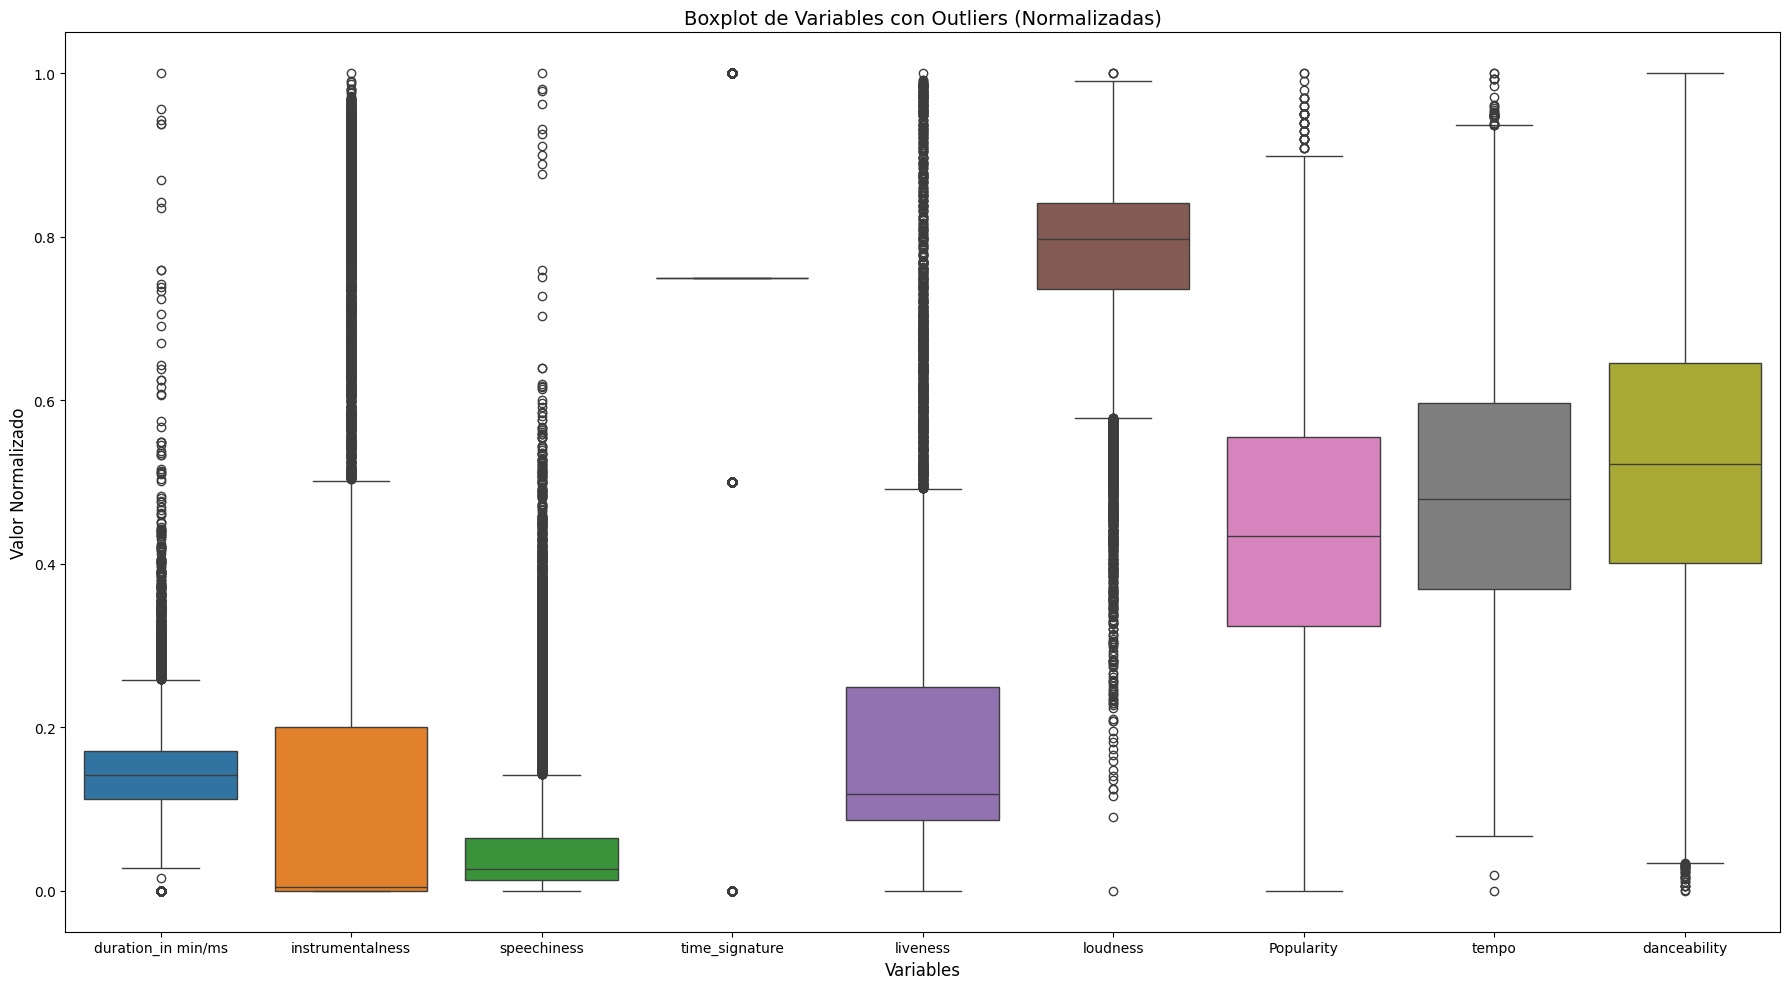

In [34]:
columnas_outliers = outliers_df['Columna'].tolist()
plot_boxplot_outliers(train_df, columnas_outliers)

### Valores nulos

## **3) ANÁLISIS EXPLORATORIO DE DATOS**

## **4) ANÁLISIS ESTADÍSTICO DE DATOS**

### Análisis Univariado

### Análisis Bivariado

### Análisis Multivariado

##**4) PREPROCESAMIENTO DE DATOS**

### Eliminar columnas irrelevantes

### Encoding & Normalizado

##**5)  SELECION DE MODELOS Y ENTRENAMIENTO**

##**6) VALIDACIÓN**